Статистическое машинное обучение

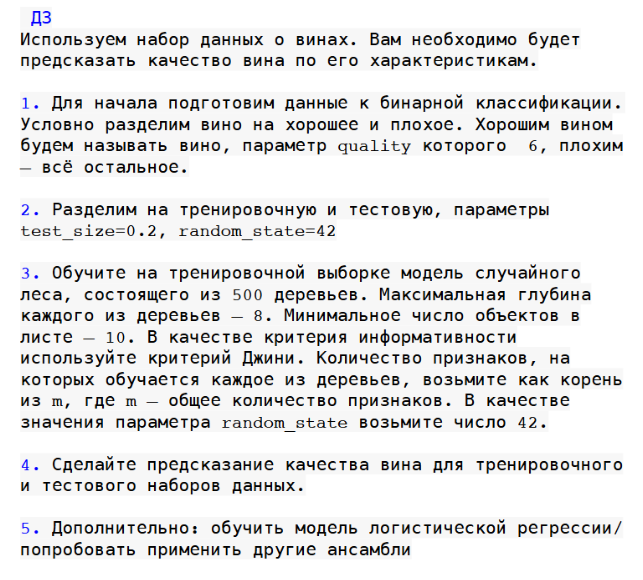

Import libraries:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

getting acquainted with the data:

In [ ]:
data = pd.read_csv('wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Let's check the data for gaps:

In [ ]:
data.isnull().sum().sum()

0

the data is fine, we classify it binary by creating a new column that determines whether the wine is good (it is good, i.e. it takes on the value 1 if its quality is greater than or equal to 6):

In [ ]:
data['is_it_good_wine'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_it_good_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


let's divide into training and testing, parameters test_size=0.2, random_state=42:

In [ ]:
X = data.drop(['quality', 'is_it_good_wine'], axis=1)
y = data['is_it_good_wine']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

creating a random forest model:

In [ ]:
model = RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_leaf=10, criterion='gini', max_features='sqrt', random_state=42)

and let's teach her:

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_estimators=500,
                       random_state=42)

making some predictions:

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Предсказание для тренировочного набора данных:", y_train_pred[:1])
print("Предсказание для тестового набора данных:", y_test_pred[:1])

Предсказания для тренировочного набора данных: [1]
Предсказания для тестового набора данных: [0]


let's find out the quality of the trained model:

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Точность модели на тренировочном наборе данных: {train_accuracy:}")
print(f"Точность модели на тестовом наборе данных: {test_accuracy:}")

Точность модели на тренировочном наборе данных: 0.8451915559030493
Точность модели на тестовом наборе данных: 0.75


based on the results, it can be assumed that the model has been overfitted, since its accuracy on the training data is significantly higher than its accuracy on the test data.